In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
bill=data[['total_bill']]
tip=data[['tip']]

In [4]:
from sklearn import linear_model
lm=linear_model.LinearRegression(fit_intercept=False)
lm.fit(bill, tip)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([[0.1437319]])

In [46]:
lm.predict(np.array([31.60]).reshape(-1, 1))

array([[4.54192789]])

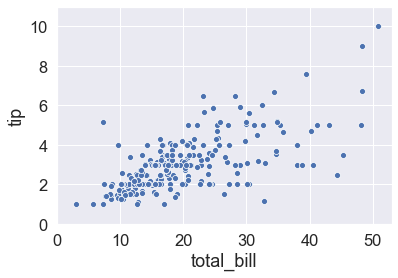

In [6]:
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('no_fit.png', dpi=300, bbox_inches='tight')

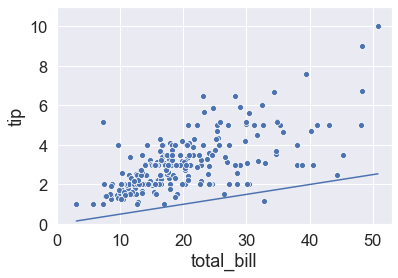

In [7]:
sns.lineplot(data['total_bill'], data['total_bill']*0.05)
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('5_percent.png', dpi=300, bbox_inches='tight')

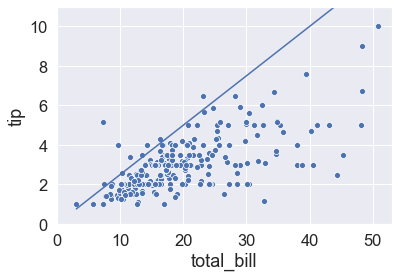

In [8]:
sns.lineplot(data['total_bill'], data['total_bill']*0.25)
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('25_percent.png', dpi=300, bbox_inches='tight')

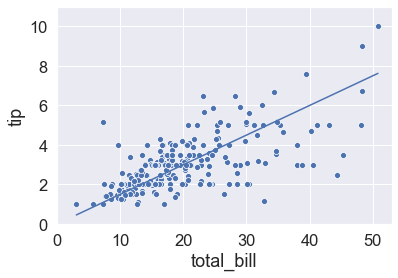

In [9]:
sns.lineplot(data['total_bill'], data['total_bill']*0.15)
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('15_percent.png', dpi=300, bbox_inches='tight')

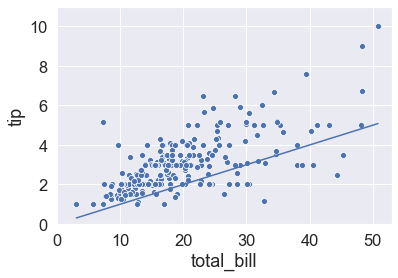

In [10]:
sns.lineplot(data['total_bill'], data['total_bill']*0.1)
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('10_percent.png', dpi=300, bbox_inches='tight')

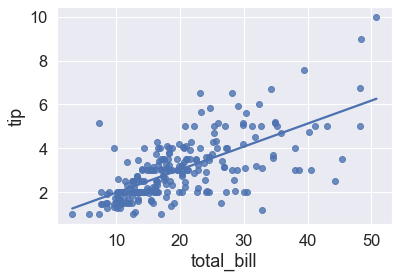

In [11]:
sns.regplot(data['total_bill'], data['tip'], ci=None)

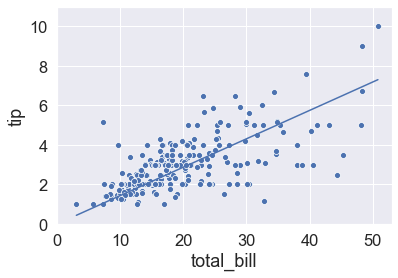

In [49]:
sns.lineplot(data['total_bill'], data['total_bill']*0.1437319)
ax=sns.scatterplot(data['total_bill'], data['tip'])
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig=ax.get_figure()
fig.savefig('14_percent.png', dpi=300, bbox_inches='tight')

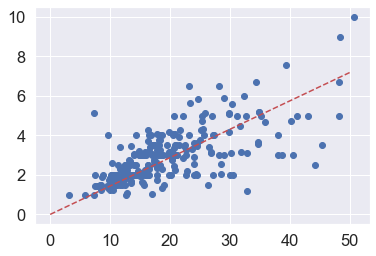

In [48]:
plt.scatter(data['total_bill'], data['tip'])
total_bill_values = np.linspace(0, 50, 100).reshape(-1, 1)
predicted_tips = lm.predict(total_bill_values)
plt.plot(total_bill_values, predicted_tips, 'r--')

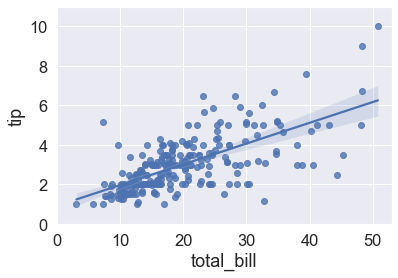

In [13]:
ax = sns.regplot(x="total_bill", y="tip", data=data)
ax.set_ylim([0, 11])
ax.set_xlim([0, 53])
fig = ax.get_figure()
fig.savefig("sns_tip_model2.png", dpi=300, bbox_inches = "tight")

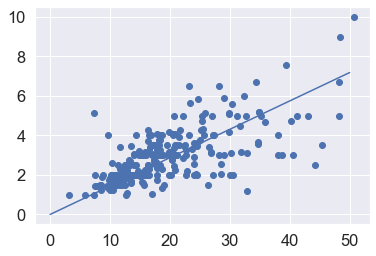

In [14]:
plt.scatter(data['total_bill'], data['tip'])

total_bill_values=np.linspace(0, 50, 100).reshape(-1, 1)
predicted_tips=lm.predict(total_bill_values)
plt.plot(total_bill_values, predicted_tips)
fig=plt.gcf()
fig.savefig('scikit_plot_tips.png', dpi=300, bbox_inches='tight')

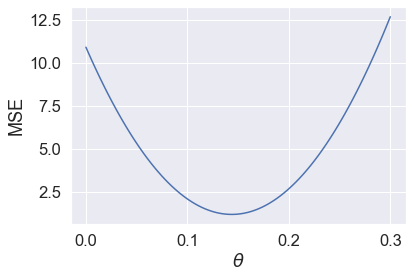

In [15]:
from sklearn.metrics import mean_squared_error

thetas=np.linspace(0, 0.3, 101)
errors=[mean_squared_error(data['tip'], data['total_bill']*theta) for theta in thetas]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
fig=plt.gcf()
fig.savefig('MSE_vs_theta.png', dpi=300, bbox_inches='tight')

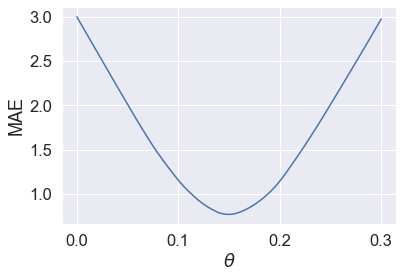

In [16]:
from sklearn.metrics import mean_absolute_error

thetas = np.linspace(0, 0.3, 101)
errors = [mean_absolute_error(data['tip'], data['total_bill']*theta) for theta in thetas]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel('MAE')
fig = plt.gcf()
fig.savefig("MAE_vs_theta.png", dpi=300, bbox_inches = "tight")

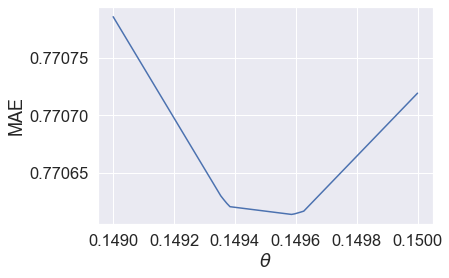

In [17]:
thetas=np.linspace(0.149, 0.15, 100)
errors=[mean_absolute_error(data['tip'], data['total_bill']*theta) for theta in thetas]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel('MAE')
fig=plt.gcf()
fig.savefig('MAE_vs_theta_zoomed.png', dpi=300, bbox_inches='tight')

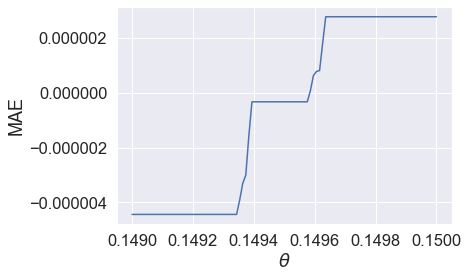

In [25]:
thetas=np.linspace(0.149, 0.150, 100)
np.gradient(errors)
plt.plot(thetas, np.gradient(errors))
plt.xlabel(r'$\theta$')
plt.ylabel('MAE')
fig=plt.gcf()
fig.savefig('MAE_deriv_vs_theta_zoomed.png', dpi=300, bbox_inches='tight')

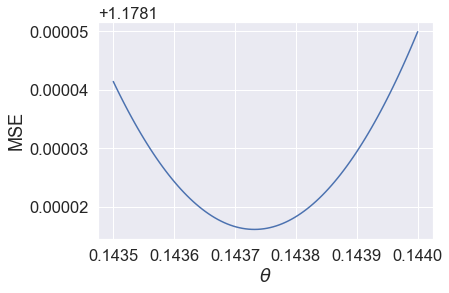

In [26]:
thetas = np.linspace(0.1435, 0.144, 100)
errors = [mean_squared_error(data['tip'], data['total_bill']*theta) for theta in thetas]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
fig = plt.gcf()
fig.savefig("MSE_vs_theta_zoomed.png", dpi=300, bbox_inches = "tight")

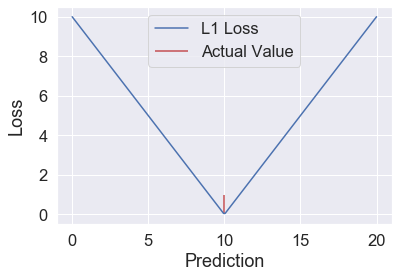

In [28]:
def l1_loss(est, y_obs):
    return np.abs(est - y_obs)

thetas=np.linspace(0, 20, 200)
loss=l1_loss(thetas, np.array([10]))
plt.plot(thetas, loss, label='L1 Loss')
plt.xlabel(r'Prediction')
plt.ylabel(r'Loss')
plt.vlines(np.array([10]), 0, 1, colors='r', label='Actual Value')
plt.legend()
fig=plt.gcf()
fig.savefig('L1_loss_one_pt.png', dpi=300, bbox_inches='tight')

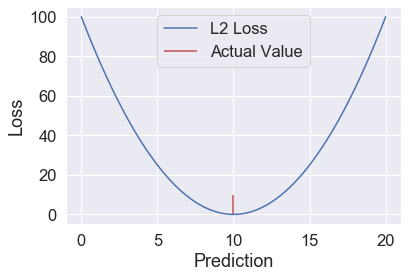

In [30]:
def l2_loss(est, y_obs):
    return(est-y_obs)**2

thetas=np.linspace(0, 20, 200)
loss=l2_loss(thetas, np.array([10]))
plt.plot(thetas, loss, label='L2 Loss')
plt.vlines(np.array([10]), 0, 10, colors='r', label='Actual Value')
plt.xlabel(r'Prediction')
plt.ylabel(r'Loss')
plt.legend()
fig=plt.gcf()
fig.savefig('L2_loss_one_pt.png', dpi=300, bbox_inches='tight')

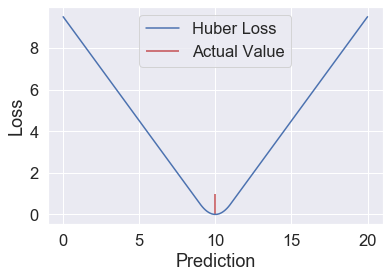

In [34]:
def huber_loss(est, y_obs, alpha=1):
    d=np.abs(est-y_obs)
    return np.where(d<alpha, (est-y_obs)**2 / 2, alpha*(d-alpha/2))

thetas=np.linspace(0, 20, 200)
loss=huber_loss(thetas, np.array([10]))
plt.plot(thetas, loss, label='Huber Loss')
plt.vlines(np.array([10]), 0, 1, colors='r', label='Actual Value')
plt.xlabel(r'Prediction')
plt.ylabel(r'Loss')
plt.legend()
fig=plt.gcf()
fig.savefig('Huber_loss_one_pt.png', dpi=300, bbox_inches='tight')

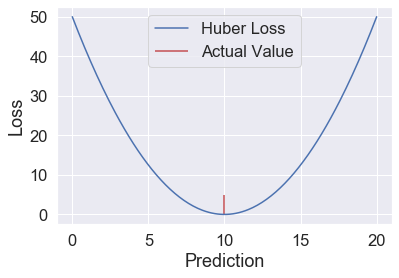

In [35]:
thetas=np.linspace(0, 20, 200)
loss=huber_loss(thetas, np.array([10]), alpha=10)
plt.plot(thetas, loss, label='Huber Loss')
plt.vlines(np.array([10]), 0, 5, colors='r', label='Actual Value')
plt.xlabel(r'Prediction')
plt.ylabel(r'Loss')
plt.legend()
fig=plt.gcf()
fig.savefig('Huber_loss_one_pt_alpha_ten.png', dpi=300, bbox_inches='tight')

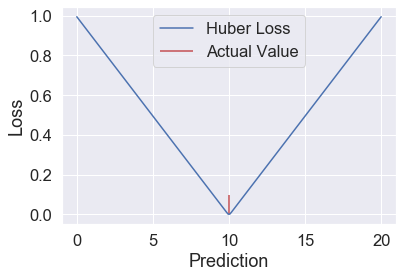

In [36]:
thetas=np.linspace(0, 20, 200)
loss=huber_loss(thetas, np.array([10]), alpha=0.1)
plt.plot(thetas, loss, label='Huber Loss')
plt.vlines(np.array([10]), 0, 0.1, colors='r', label='Actual Value')
plt.xlabel(r'Prediction')
plt.ylabel(r'Loss')
plt.legend()
fig=plt.gcf()
fig.savefig('Huber_loss_one_pt_alpha_tenth.png', dpi=300, bbox_inches='tight')

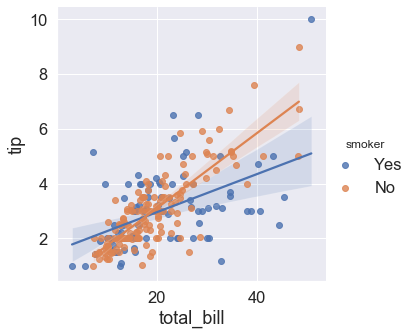

In [38]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=data)
fig=plt.gcf()
fig.savefig('two_condition_seaborn.png', dpi=300, bbox_inches='tight')

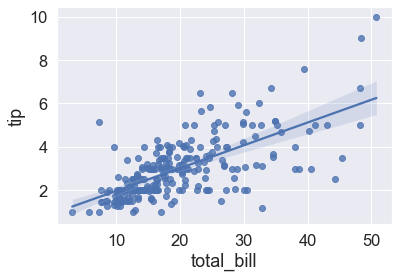

In [39]:
sns.regplot(x="total_bill", y="tip", data=data)

In [50]:
## make a copy of the data frame with only bill and tip
loss_example = pd.DataFrame(data[["total_bill", "tip"]])
loss_example.head(5)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [51]:
## add predictions to dataframe
loss_example["prediction"] = lm.predict(loss_example["total_bill"].values.reshape(-1, 1))
loss_example.head(5)

,total_bill,tip,prediction
0,16.99,1.01,2.442005
1,10.34,1.66,1.486188
2,21.01,3.50,3.019807
3,23.68,3.31,3.403571
4,24.59,3.61,3.534367


In [52]:
## compute the loss for each
loss_example["loss"] = (loss_example["tip"] - loss_example["prediction"])**2
loss_example.head(5)

,total_bill,tip,prediction,loss
0,16.99,1.01,2.442005,2.050638
1,10.34,1.66,1.486188,0.030211
2,21.01,3.50,3.019807,0.230585
3,23.68,3.31,3.403571,0.008756
4,24.59,3.61,3.534367,0.005720


In [53]:
## compute the average loss
np.mean(loss_example["loss"])

1.1781161154513171

In [54]:
## or we can do this in just one line of code using sklearn.metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(data['tip'], lm.predict(data['total_bill'].values.reshape(-1, 1)))

1.1781161154513171

In [55]:
mean_squared_error(data['tip'], data['total_bill']*0.1)

2.0777683729508194

In [56]:
mean_squared_error(data['tip'], data['total_bill']*0.13)

1.2668192650409837

In [57]:
mean_squared_error(data['tip'], data['total_bill']*0.14)

1.18466755852459

In [59]:
mean_squared_error(data['tip'], data['total_bill']*0.15)

1.196598183401639

In [60]:
mean_squared_error(data['tip'], data['total_bill']*0.145)

1.178872579538934

In [69]:
mean_squared_error(data['tip'], data['total_bill']*0.147)

1.1831403511422127

From the plot above, we see that the loss is minimized for $\theta$ around 0.14. Indeed, scikit-learn computes the value by effectively traversing down the curve shown above. This can be done using a calculus based technique called "gradient descent" that we will not discuss in detail.

In [62]:
mean_absolute_error(data['tip'], data['total_bill']*0.1437)

0.778321963114754

In [63]:
mean_absolute_error(data['tip'], data['total_bill']*0.15)

0.7707192622950819

In [64]:
mean_absolute_error(data['tip'], data['total_bill']*0.145)

0.7755313524590164

In [67]:
f_huber = linear_model.HuberRegressor(epsilon = 1, fit_intercept=False)
features = data[["total_bill"]]
tip = data["tip"]
f_huber.fit(features, tip)

HuberRegressor(alpha=0.0001, epsilon=1, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)

In [68]:
f_huber.coef_

array([0.14958863])

### For very small epsilon, we are fitting something close to L1 loss.
### For very large epsilon, we are effectively fitting L2 loss.